# Understanding how Linear Regression Works

This notebook contains code that'll help you understand how linear regression is carried out in practice and how it can be used practically

**The Basic Idea:**


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [76]:
class LinearRegression:

    def __init__(self):
        
        self.train_losses = []
        self.w = None
        self.weights = np.array([])
        self.bias = 0


    def gradient_descent(self,X, y):
        return (1/X.shape[0]) * X.transpose().dot((self._evaluate(X) - y))

    def  update_coeffs(self,X, y, learning_rate):
        self.w  -= learning_rate * self.gradient_descent(X, y)
        

    def _evaluate(self, X):
        return np.dot(X, self.w)
    
    def loss(self, y_true, y_pred):
        return (1/2) * ((y_true - y_pred).dot((y_true-y_pred).T)).mean()

    def fit(self, X_train, y_train, learning_rate = 0.002, epochs = 10):
        #weights = np.random.uniform(low = -100, high = 100, size = X_train.shape[1])
        weights = np.zeros(X_train.shape[1])
        X = np.c_[X_train, np.ones(X_train.shape[0])]
        self.w = np.append(weights, self.bias)
        for epoch in range(epochs):
            self.update_coeffs(X, y_train,learning_rate)
            self.train_losses.append(self.loss(y_train, self._evaluate(X)))
        self.weights = self.w[:-1]
        self.bias = self.w[-1]
    
    def plot_losses(self):
        plt.plot(self.train_losses, label = "Train Loss")
        plt.title("Loss Curve", fontsize = 18)
        plt.xlabel("Epochs", fontsize = 14)
        plt.ylabel("Error", fontsize = 14)
        plt.legend()
        plt.show()

    def predict(self, X_val):
        X_val = np.array(X_val)
        X = np.c_[X_val,np.ones(X_val.shape[0])]
        return self._evaluate(X)

In [77]:
def gen_linear_dataset(n, scale, std_dev, c):
    """
    Generates a synthetic linear regression dataset
    n       -- Number of data points (rows)
    scale   -- Scaling factor
    std_dev -- Standard deviation
    c       -- intercept
    """
    x = np.array([i for i in range(n)])
    e = np.random.randn(n) * std_dev        # Sample from normal distribution and multiply by std deviation
    y = x * scale + e + c
    return x.reshape(-1, 1), y

In [78]:
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

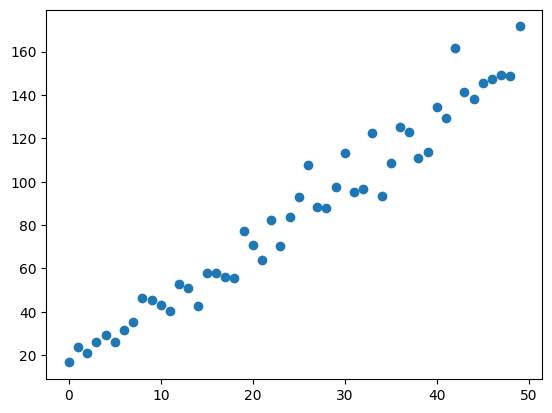

In [79]:
X, y = gen_linear_dataset(50, 3, 8, 10)
plt.scatter(X[:, 0], y)
plt.show()

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

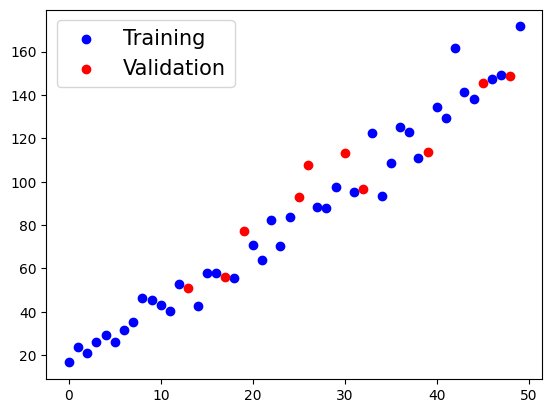

In [81]:
plt.scatter(X_train[:, 0], y_train, c='b', label="Training")
plt.scatter(X_val[:, 0], y_val, c='r', label="Validation")
plt.legend(fontsize=15)
plt.show()

In [82]:
model = LinearRegression()
model.fit(X_train, 
          y_train,
          learning_rate=0.002,
          epochs=10)

print("Training Complete")
print(model.w)

Training Complete
[3.31219267 0.17790569]


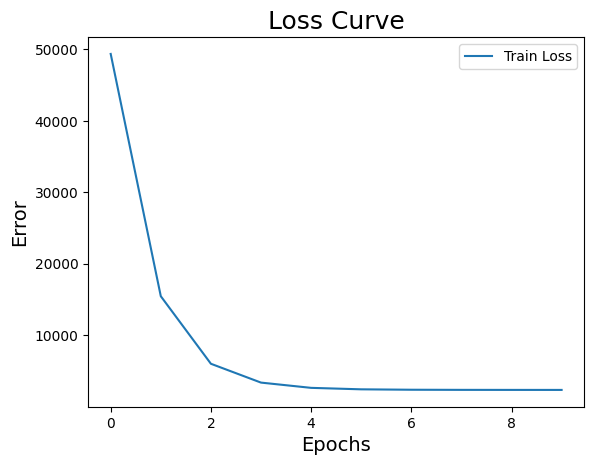

Validation set MSE: 145.76619956649455


In [83]:
model.plot_losses()
print(f"Validation set MSE: {mean_squared_error(y_val, model.predict(X_val))}")

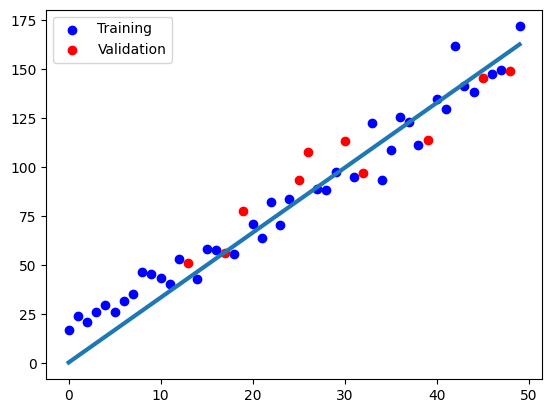

In [84]:
plt.scatter(X_train[:, 0], y_train, c='b', label="Training")
plt.scatter(X_val[:, 0], y_val, c='r', label="Validation")
plt.plot(X[:, 0], model.predict(X), linewidth=3)
plt.legend()
plt.show()

In [85]:
lr_model = lr()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
mean_squared_error(y_val, y_pred)

95.77867749878081

## Ridge Regression



In [86]:
class RidgeRegression(LinearRegression):

    def __init__(self, alpha):
        super().__init__()
        self.alpha = alpha
    
    def gradient_descent(self, X, y):
        return super().gradient_descent(X, y) + self.alpha * self.w
    
    def loss(self, y_true, y_pred):
        return super().loss(y_true, y_pred) + 0.5 * self.alpha * (self.w.dot(self.w.T))
    

Training Complete
[3.31173978 0.17782276]


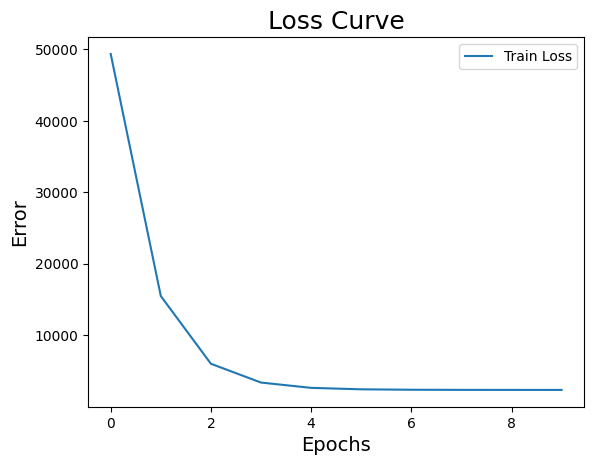

145.76702126113642


In [88]:
model = RidgeRegression(alpha=0.1)
model.fit(X_train, 
          y_train,
          learning_rate=0.002,
          epochs=10)

print("Training Complete")
print(model.w)
y_pred = model.predict(X_val)
model.plot_losses()
print(mean_squared_error(y_val, y_pred))

In [89]:
ridge_model = Ridge(alpha = 0.1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_val)
mean_squared_error(y_val, y_pred)

95.77715448035194

## Lasso Regression

In [87]:
class LassoRegression(LinearRegression):
    def __init__(self, alpha):
        super().__init__()
        self.alpha = alpha  
      
    def gradient_descent(self, X, y):
        return super().gradient_descent(X, y)  +  self.alpha * np.sign(self.w)  #Technically subgradient descent
    
    def loss(self, y_true, y_pred):
        return super().loss(y_true, y_pred) + self.alpha * np.abs(self.w)
    
    

Training Complete
[3.31211054 0.17616213]


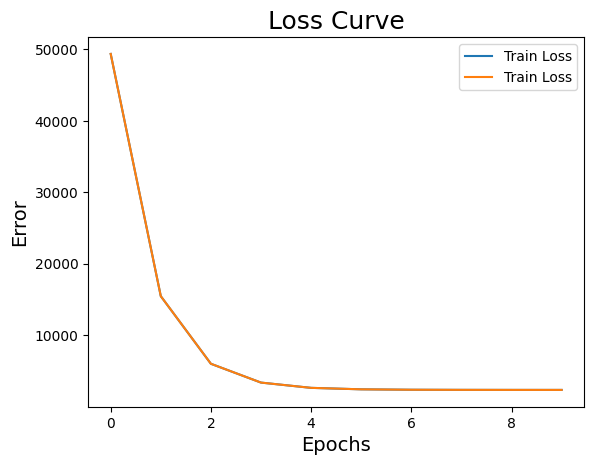

145.77578087336173

In [90]:
model = LassoRegression(alpha=0.1)
model.fit(X_train, 
          y_train,
          learning_rate=0.002,
          epochs=10)

print("Training Complete")
print(model.w)
y_pred = model.predict(X_val)
model.plot_losses()
mean_squared_error(y_val, y_pred)

In [91]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_val)
mean_squared_error(y_val, y_pred)

95.75780999821258

## A Practical Example